## Imports

Begin by importing the required libraries.

In [5]:
!pip install sklearn
!pip install seaborn
!pip install matplotlib

In [6]:
import pandas as pd
import sklearn as sk
import seaborn as sb
import matplotlib.pyplot as plt

Import the generated dataset.

In [8]:
data = pd.read_csv("mergeInsertionSortPart1.csv", header=0)

data.head()

,Array Size,Key comparisons,Execution time
0,1000,10163,0.000
1,2000,22619,0.001
2,3000,33815,0.000
3,4000,49302,0.001
4,5000,58224,0.001


## Empirical Analysis

In C(i), we set the value of **S** to be equal to 16.

Plot the number of key comparisons against array size.

<AxesSubplot:xlabel='Array Size', ylabel='Key comparisons'>

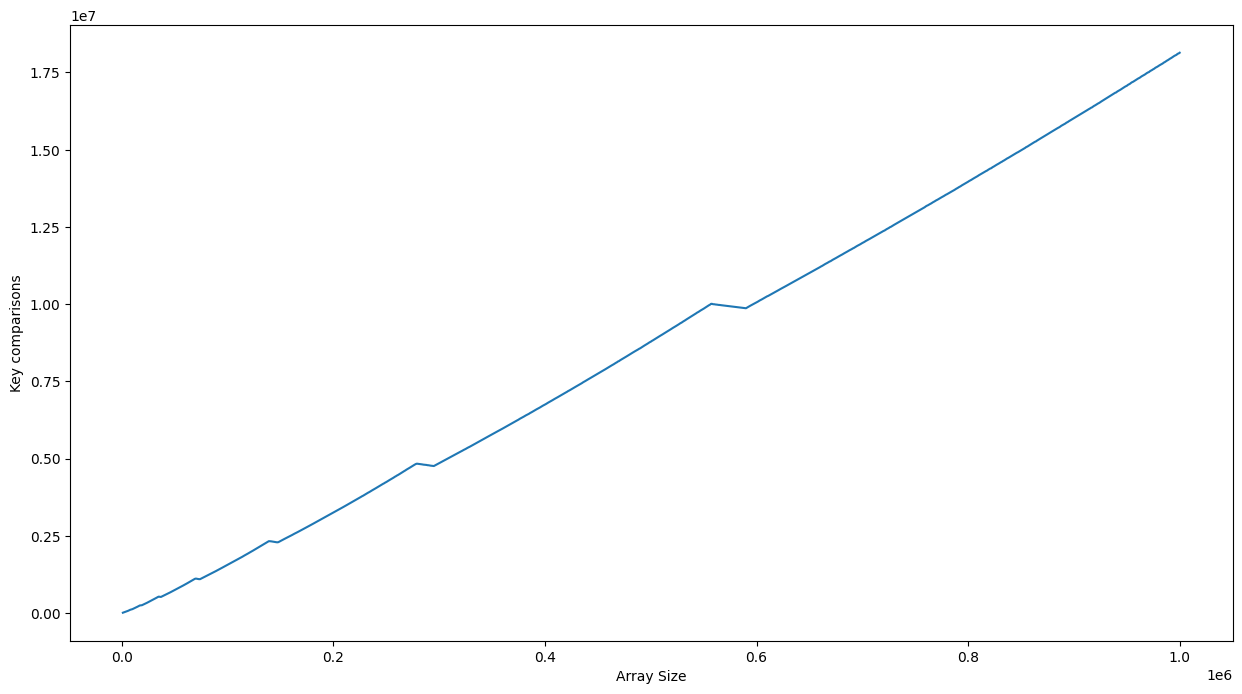

In [9]:
fig = plt.gcf()
fig.set_size_inches(15, 8)

sb.lineplot(data, x="Array Size", y="Key comparisons")

Plot the execution time against the array size.

<AxesSubplot:xlabel='Array Size', ylabel='Execution time '>

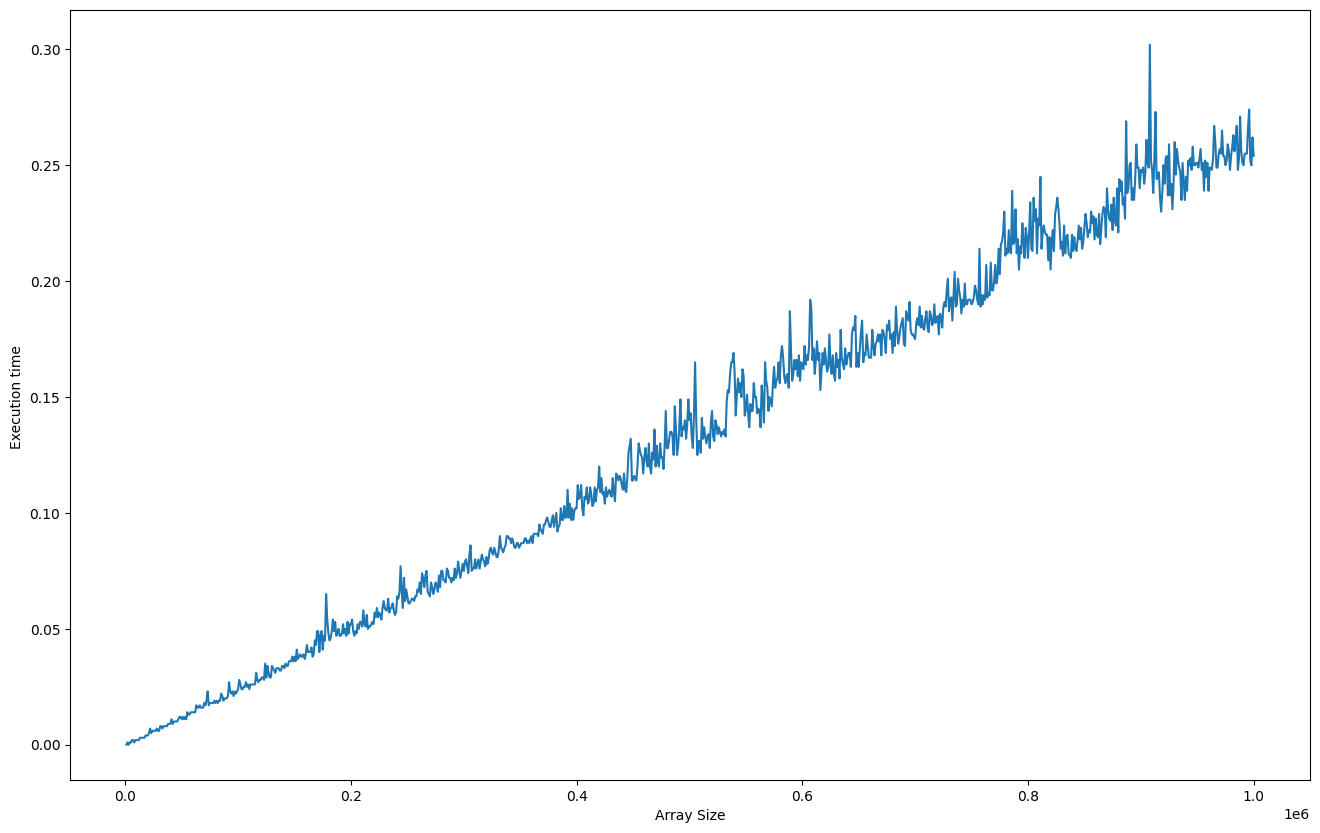

In [10]:
fig = plt.gcf()
fig.set_size_inches(16, 10)

sb.lineplot(data, x="Array Size", y="Execution time ")

Now, we compare with the traditional Merge Sort algorithm.

In [11]:
data2 = pd.read_csv("mergeSortPart1.csv", header=0)

data2.head()

,Array Size,Key comparisons,Execution time
0,1000,8702,0.000
1,2000,19373,0.000
2,3000,30755,0.000
3,4000,42606,0.001
4,5000,54848,0.001


<AxesSubplot:xlabel='Array Size', ylabel='Key comparisons'>

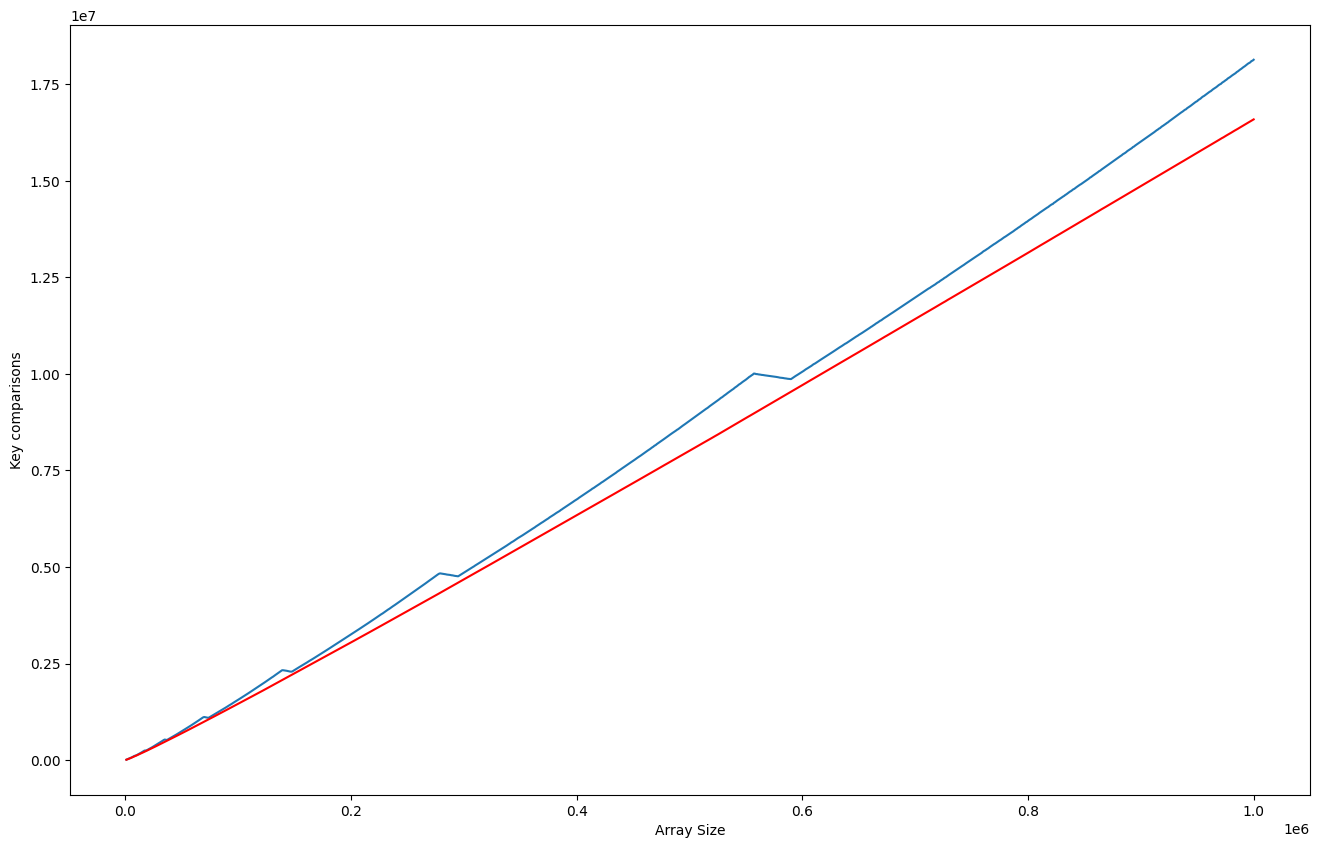

In [12]:
fig = plt.gcf()
fig.set_size_inches(16, 10)

sb.lineplot(data=data, x='Array Size', y='Key comparisons')
sb.lineplot(data=data2, x='Array Size', y='Key comparisons', color="red")

<AxesSubplot:xlabel='Array Size', ylabel='Execution time '>

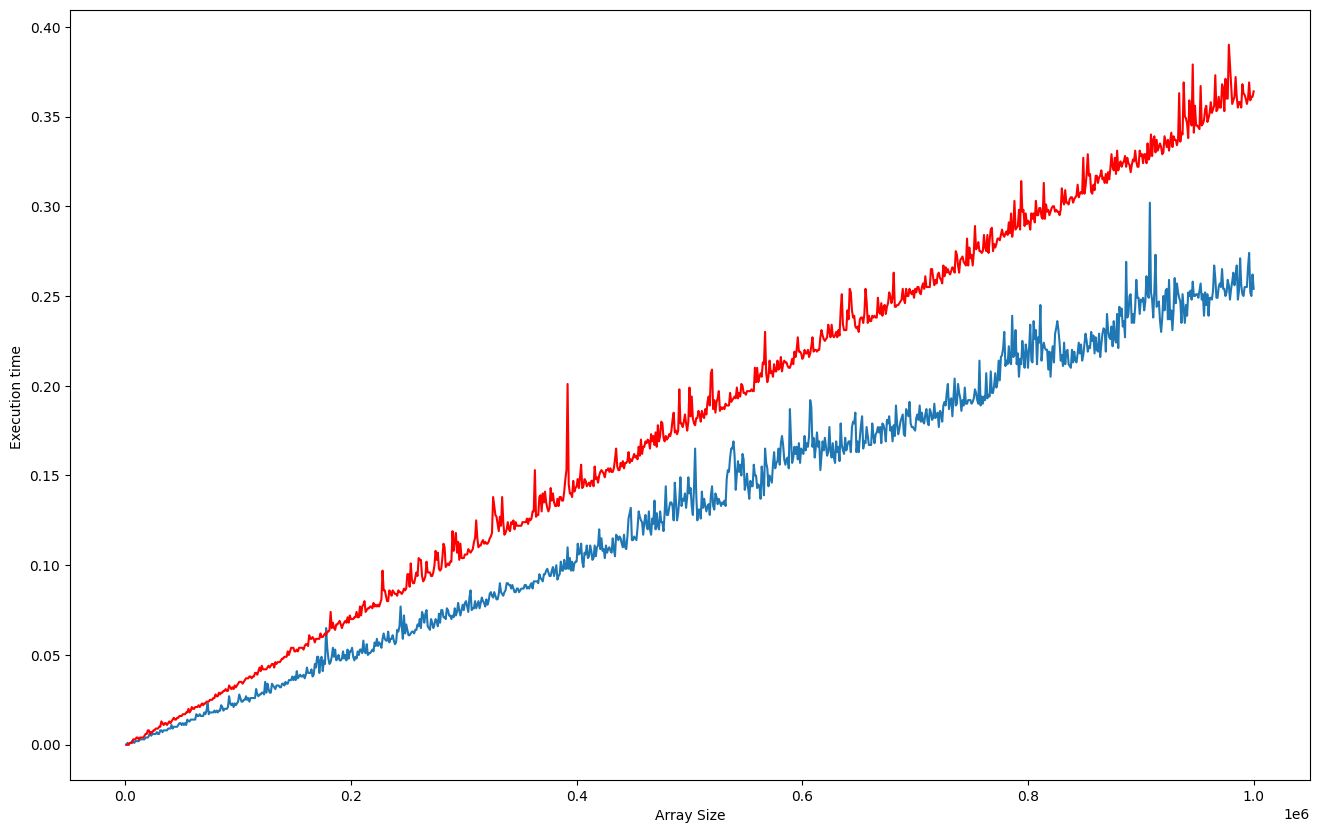

In [14]:
fig = plt.gcf()
fig.set_size_inches(16, 10)

sb.lineplot(data=data, x='Array Size', y='Execution time ')
sb.lineplot(data=data2, x='Array Size', y='Execution time ', color="red")

## Theoretical Analysis

The Merge Sort algorithm has a time complexity of ***O(n log n)*** for all scenarios whereas the Insertion Sort algorithm has a time complexity of ***O(n)*** for best-case and ***O(n<sup>2</sup>)*** for average-case and worst-case. 

The hybrid Merge-Insertion Sort algorithm involves the following key steps:
1. Perform normal Merge Sort operation on the array of length *n*.
2. If the array length is smaller than *s*, switch to Insertion Sort.

***<u>Merge Sort</u>***

Define ***T*(*n*)** as the number of key comparisons for an array of length *n* using the hybrid Merge-Insertion Sort algorithm.

We begin with a top-down approach (*mergesort* method) until we satisfy the condition of Step 2. Once Step 2 is executed, we return with a bottom-up approach (*merge* method).

The *mergesort* method is called twice on every recursive call and the *mergesort* method performs key comparisons on at most *n - 1* elements. Hence,
> *T*(*n*) <br>
> = 2 *T*(*n*/2) + (*n*  - 1) <br>
> = 2<sup>2</sup> *T*(*n*/4) + 2 ((*n*/2) - 1) + *n* - 1 <br>
> = 2<sup>2</sup> *T*(*n*/4) + *n*  - 2 + *n*  - 1 <br>
> = 2<sup>3</sup> *T*(*n*/8) + *n*  - 4 + *n*  - 2 + *n*  - 1 <br>
> = 2<sup>3</sup> *T*(*n*/8) + 3*n*  - (1 + 2 + 4) <br>
> = ... <br>

***<u>Insertion Sort</u>***

Suppose that *k* = ⌈*log*<sub>2</sub> *n/s*⌉ for some integer *k*. Then, Step 2 will be carried out on *n*/*s* ≤ *n*/2<sup>*k*</sup> sub-arrays of length ≤ *s*.

Thus, 
> *T*(*s*) = ***O(s)*** for best-case scenario. <br>
> *T*(*s*) = ***O(s<sup>2</sup>)*** for average-case and worst-case scenario.

Continuing from the recurrence relation,
> *T*(*n*) <br>
> = 2<sup>*k*</sup> *T*(*n*/2<sup>*k*</sup>) + *kn*  - (1 + 2 + 4 + ... + 2<sup>*k* - 1</sup>) <br>
> ≥ (*n*/*s*) *T*(*s*) + *n log*<sub>2</sub> (*n/s*) - 2<sup>*k* - 1</sup> - 1 <br>


Worst-case and Average-case
> = (*n*/*s*)(s<sup>2</sup>) + *n log*<sub>2</sub> (*n/s*) - (2<sup>*k*</sup>/2) - 1 <br>
> = *ns* + *n log*<sub>2</sub> (*n/s*) - (*n*/2*s*) - 1 <br>
> = θ ((*s* - 1/2*s*) *n* + *n log* (*n/s*))

Best-case
> = (*n*/*s*)(s) + *n log*<sub>2</sub> (*n/s*) - (2<sup>*k*</sup>/2) - 1 <br>
> = *n* + *n log*<sub>2</sub> (*n/s*) - (*n*/2*s*) - 1 <br>
> = θ ((1 - 1/2*s*) *n* + *n log* (*n/s*))


When ***s*** is fixed, the asymptotic notation of the hybrid Merge-Insertion Sort algorithm simplifies to θ (*n* + *n log* (*n*)) = θ (*n log* (*n*)), which is equivalent to the asymptotic notation of Merge Sort algorithm.

From the plots, we see that the the number of key comparisons done by the hybrid Merge-Insertion Sort algorithm is higher than the Merge Sort algorithm as expected since the time complexity of Merge Sort has an additional *n* factor which is ommited in the asymptotic notation.

However, since the Merge-Insertion Sort algorithm incorporated the Insertion Sort algorithm, which has a low constant factor, the execution time of using Merge-Insertion Sort algorithm is noticeably shorter than using Merge Sort algorithm, as shown in the comparison plot.